In [1]:
import sys  
import pandas as pd
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from isolation_forest import *

# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

# Database query

In [2]:
df = database_query("SELECT * FROM SensorData LIMIT 10000;")
df.head(5)

,node_id,timestamp,x,y,z,q
0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0


Number of missing variables in table
 node_id      0
timestamp    0
x            0
y            0
z            0
q            0
dtype: int64
------------------------------
Unique values in columns

------------------------------
Number of nodes: 1
------------------------------
Outliers

Data with outliers:  10000
Ouliers removed:     152
Data after:  9848


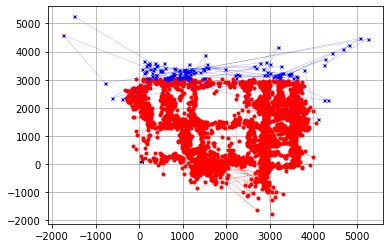

In [3]:
from sisään_uloskäynnit import *

df1 = find_outliers(df, 'x', 'y')
df1 = xy_to_grid(df1, df1.x, df1.y, 100)

# Piirretään gridin sisään- ja uloskäynti.
- Sisäänkäynti sinisellä
- Uloskäynti pinkillä

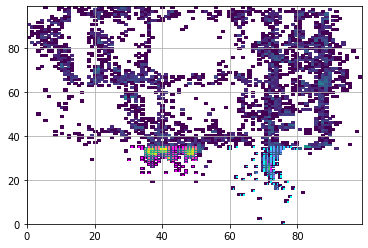

In [4]:
sisään_xx, sisään_yy = sisään(df1)
ulos_xx, ulos_yy = ulos(df1)

draw_exits(df1, sisään_xx, sisään_yy, ulos_xx, ulos_yy)